In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
plt.rc('axes', axisbelow=True)
plt.rcParams.update({'figure.autolayout': True})

metric_names = ['mae', 'rmse', 'pcc', 'r2']
model_ls_all = np.array([
    # 'gcn_d3_FFF-1x32-0_Nmean',
    'gcn_d3e_FFF-1x32-0_Nmean',
    'c1e-N',
    'd0e_F',
    'DeepSTABp_architecture',
], dtype=np.str_)
metric_limits = {
    'mae': [0,10],
    'rmse': [0,10],
    'pcc': [0,1],
    'r2': [0,1]
}

In [2]:
save = True

In [3]:
model_names = {
    'gcn_d3_FFF-1x32-0_Nmean': '1x32 graph w/o Tm embedding',
    'gcn_d3e_FFF-1x32-0_Nmean': '1x32 graph w/ Tm embedding',
    'c1e-N': 'ProteinBERT',
    'd0e_F': 'Tm embedding',
    'DeepSTABp_architecture': 'DeepSTABp',
}

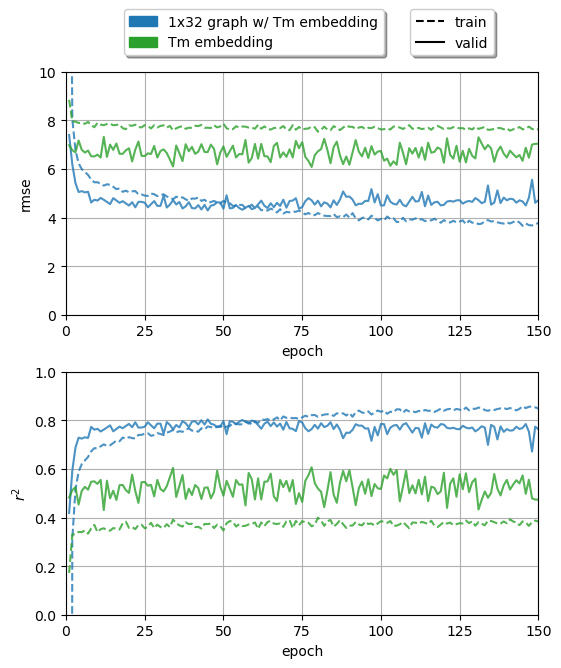

In [7]:
model_ls = model_ls_all[[0, 2]]

fig, ax = plt.subplots(
    2, 1, sharex=True, sharey=False, figsize=(5.5,6), layout='constrained'
)
ax = ax.flatten()
# fig.suptitle()

i = 0
for metric_idx, metric in enumerate(['rmse', 'r2']):
    df = pd.read_csv(f'model_performance-{metric}.csv')
    for model_idx, model in enumerate(model_ls):
        # if model == 'DeepSTABp_architecture':
        #     c = 'gray'
        #     alpha = 0.6
        # else:
        c = f'C{np.argwhere(model_ls_all==model).squeeze()}'
        alpha = 0.8
        
        ax[i].plot(
            df['epoch'], df[f'{model} - train.{metric}'], '--',
            c=c, alpha=alpha,
            # linewidth=1,
            # label=f'{model[5:]}'
        )
        ax[i].plot(
            df['epoch'], df[f'{model} - valid.{metric}'], '-',
            c=c, alpha=alpha,
            # linewidth=1,
            # label=f'{model[5:]}: valid'
        )

    ax[i].set_xlabel('epoch')
    ax[i].set_ylabel(metric if metric == 'rmse' else r'$r^2$')
    ax[i].set_xticks(np.arange(0,df['epoch'].max()+1,25), labels=np.arange(0,df['epoch'].max()+1,25))
    ax[i].tick_params(labelbottom=True)
    
    ax[i].set_xlim(0, df['epoch'].max())
    ax[i].set_ylim(metric_limits[metric])

    ax[i].grid()

    # handles, labels = ax[i].get_legend_handles_labels()
    
    i += 1

handles = []
for model_idx, model in enumerate(model_ls):
    # if model == 'DeepSTABp':
    #     c = 'black'
    #     label = 'DeepSTABp'
    # else:
    c = f'C{np.argwhere(model_ls_all==model).squeeze()}'
    label = f'{model_names[model]}'

    handles.append(
        mpatches.Patch(color=c, label=label)
    )
fig.legend(
    handles=handles, bbox_to_anchor=(0.7,1.1), #loc='outside upper left',
    ncols=1, fancybox=True, shadow=True
)
handles = [
    mlines.Line2D([], [], color='black', linestyle='--', label='train'),
    mlines.Line2D([], [], color='black', linestyle='-', label='valid')
]
fig.legend(
    handles=handles, bbox_to_anchor=(0.9,1.1), #loc='outside upper right',
    ncols=1, fancybox=True, shadow=True
)

if save:
    plt.savefig('metrics1.png', dpi=300, bbox_inches=Bbox([[0,0],[5.5,6.6]]))
plt.show()
plt.close()

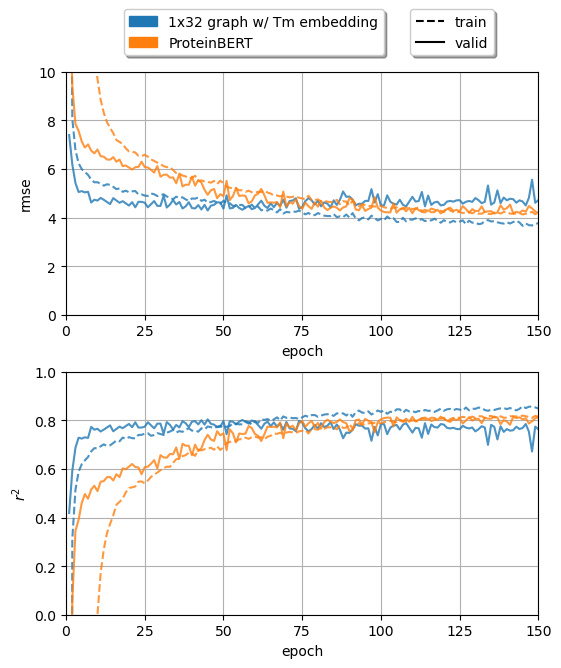

In [8]:
model_ls = model_ls_all[[0, 1]]

fig, ax = plt.subplots(
    2, 1, sharex=True, sharey=False, figsize=(5.5,6), layout='constrained'
)
ax = ax.flatten()
# fig.suptitle()

i = 0
for metric_idx, metric in enumerate(['rmse', 'r2']):
    df = pd.read_csv(f'model_performance-{metric}.csv')
    for model_idx, model in enumerate(model_ls):
        # if model == 'DeepSTABp_architecture':
        #     c = 'gray'
        #     alpha = 0.6
        # else:
        c = f'C{np.argwhere(model_ls_all==model).squeeze()}'
        alpha = 0.8
        
        ax[i].plot(
            df['epoch'], df[f'{model} - train.{metric}'], '--',
            c=c, alpha=alpha,
            # linewidth=1,
            #label=f'{model[5:]}'
        )
        ax[i].plot(
            df['epoch'], df[f'{model} - valid.{metric}'], '-',
            c=c, alpha=alpha,
            # linewidth=1,
            #label=f'{model[5:]}: valid'
        )

    ax[i].set_xlabel('epoch')
    ax[i].set_ylabel(metric if metric == 'rmse' else r'$r^2$')
    ax[i].set_xticks(np.arange(0,df['epoch'].max()+1,25), labels=np.arange(0,df['epoch'].max()+1,25))
    ax[i].tick_params(labelbottom=True)
    
    ax[i].set_xlim(0, df['epoch'].max())
    ax[i].set_ylim(metric_limits[metric])

    ax[i].grid()

    # handles, labels = ax[i].get_legend_handles_labels()
    
    i += 1

handles = []
for model_idx, model in enumerate(model_ls):
    # if model == 'DeepSTABp':
    #     c = 'black'
    #     label = 'DeepSTABp'
    # else:
    c = f'C{np.argwhere(model_ls_all==model).squeeze()}'
    label = f'{model_names[model]}'

    handles.append(
        mpatches.Patch(color=c, label=label)
    )
fig.legend(
    handles=handles, bbox_to_anchor=(0.7,1.1), #loc='outside upper left',
    ncols=1, fancybox=True, shadow=True
)
handles = [
    mlines.Line2D([], [], color='black', linestyle='--', label='train'),
    mlines.Line2D([], [], color='black', linestyle='-', label='valid')
]
fig.legend(
    handles=handles, bbox_to_anchor=(0.9,1.1), #loc='outside upper right',
    ncols=1, fancybox=True, shadow=True
)

if save:
    plt.savefig('metrics2.png', dpi=300, bbox_inches=Bbox([[0,0],[5.5,6.6]]))
plt.show()
plt.close()

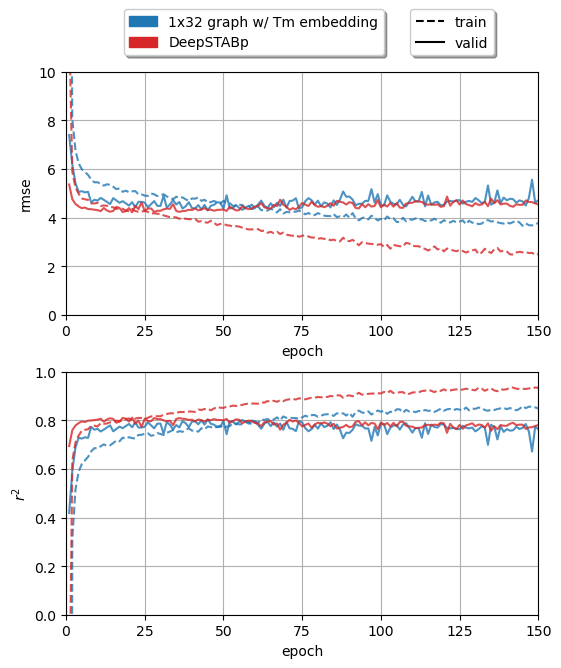

In [9]:
model_ls = model_ls_all[[0, 3]]

fig, ax = plt.subplots(
    2, 1, sharex=True, sharey=False, figsize=(5.5,6), layout='constrained'
)
ax = ax.flatten()
# fig.suptitle()

i = 0
for metric_idx, metric in enumerate(['rmse', 'r2']):
    df = pd.read_csv(f'model_performance-{metric}.csv')
    for model_idx, model in enumerate(model_ls):
        # if model == 'DeepSTABp_architecture':
        #     c = 'gray'
        #     alpha = 0.6
        # else:
        c = f'C{np.argwhere(model_ls_all==model).squeeze()}'
        alpha = 0.8
        
        ax[i].plot(
            df['epoch'], df[f'{model} - train.{metric}'], '--',
            c=c, alpha=alpha,
            #linewidth=1,
            #label=f'{model[5:]}'
        )
        ax[i].plot(
            df['epoch'], df[f'{model} - valid.{metric}'], '-',
            c=c, alpha=alpha,
            #linewidth=1,
            #label=f'{model[5:]}: valid'
        )

    ax[i].set_xlabel('epoch')
    ax[i].set_ylabel(metric if metric == 'rmse' else r'$r^2$')
    ax[i].set_xticks(np.arange(0,df['epoch'].max()+1,25), labels=np.arange(0,df['epoch'].max()+1,25))
    ax[i].tick_params(labelbottom=True)
    
    ax[i].set_xlim(0, df['epoch'].max())
    ax[i].set_ylim(metric_limits[metric])

    ax[i].grid()

    # handles, labels = ax[i].get_legend_handles_labels()
    
    i += 1

handles = []
for model_idx, model in enumerate(model_ls):
    # if model == 'DeepSTABp':
    #     c = 'black'
    #     label = 'DeepSTABp'
    # else:
    c = f'C{np.argwhere(model_ls_all==model).squeeze()}'
    label = f'{model_names[model]}'

    handles.append(
        mpatches.Patch(color=c, label=label)
    )
fig.legend(
    handles=handles, bbox_to_anchor=(0.7,1.1), #loc='outside upper left',
    ncols=1, fancybox=True, shadow=True
)
handles = [
    mlines.Line2D([], [], color='black', linestyle='--', label='train'),
    mlines.Line2D([], [], color='black', linestyle='-', label='valid')
]
fig.legend(
    handles=handles, bbox_to_anchor=(0.9,1.1), #loc='outside upper right',
    ncols=1, fancybox=True, shadow=True
)

if save:
    plt.savefig('metrics3.png', dpi=300, bbox_inches=Bbox([[0,0],[5.5,6.6]]))
plt.show()
plt.close()